<a href="https://colab.research.google.com/github/Nayeong127/meotjin_yeongna/blob/main/220314_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5_imdb%EB%A6%AC%EB%B7%B0%EA%B0%90%EC%84%B1%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data() #영화 리뷰 데이터를 로드.  #여기서 num_words를 사용하면 등장 빈도 순위로 몇 등까지의 단어를 사용할 것인지

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

17473536/17464789 [==============================] - 0s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [ ]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


- 토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태
- 단어들의 등장 빈도에 따라서 인덱스를 부여 
  - 숫자가 낮을수록 이 데이터에서 등장 빈도 순위가 높
- 감성 정보 0 또는 1인데 부정: 0, 긍정: 1

리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


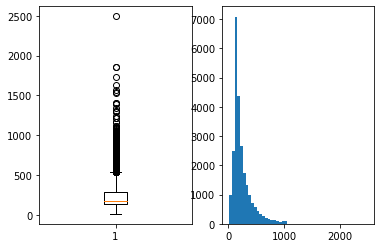

In [ ]:
# 25,000개의 훈련용 리뷰의 각 길이는 전부 다른데, 리뷰의 길이 분포를 그래프로 시각화해보겠습니다.

reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

- 대체적으로 1,000이하
- 100~500길이를 가진 데이터가 많
- 가장 긴 길이를 가진 데이터: 2,000 이상!

In [ ]:
# 레이블의 분포 확인

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


- 0과 1은 각각 12,500개로 균등한 분포

In [ ]:
#X_train에 들어있는 숫자들이 각각 어떤 단어들을 나타내고 있는지 확인

word_to_index = imdb.get_word_index() #imdb.get_word_index()에 각 단어와 맵핑되는 정수가 저장! 근데 +3을 해야 실제 맵핑되는 정수
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
print('빈도수 상위 1등 단어 : {}'.format(index_to_word[4]))  #인덱스 넣으면 전처리 전에 어떤 단어였는지 확인 ㄱㄴ
#IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급헤서 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어!!!!!!!

빈도수 상위 1등 단어 : the


In [ ]:
print('빈도수 상위 3938등 단어 : {}'.format(index_to_word[3941]))

빈도수 상위 3938등 단어 : suited


In [ ]:
#첫번째 훈련용 리뷰의 X_train[0]의 각 단어가 정수로 바뀌기 전에 어떤 단어들이었는지 확인
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad

In [ ]:
# 단어 집합의 크기를 10,000으로 제한하고, 리뷰 최대 길이는 500으로 제한하여 패딩 진행

import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
max_len = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='sigmoid')) #마지막 시점에서 이진 분류 문제를 수행하니까 시그모이드

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) #검증 데이터 손실(val_loss)이 증가하면, 과적합 징후므로 검증 데이터 손실이 4회 증가하면 정해진 에포크가 도달하지 못하였더라도 학습을 조기 종료
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) #ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) #훈련 데이터의 20%를 검증 데이터로 분리해서 사용


Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.5104 - acc: 0.7585
Epoch 1: val_acc improved from -inf to 0.85340, saving model to GRU_model.h5
313/313 [==============================] - 306s 970ms/step - loss: 0.5104 - acc: 0.7585 - val_loss: 0.4394 - val_acc: 0.8534
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3143 - acc: 0.8752
Epoch 2: val_acc improved from 0.85340 to 0.88020, saving model to GRU_model.h5
313/313 [==============================] - 299s 956ms/step - loss: 0.3143 - acc: 0.8752 - val_loss: 0.2933 - val_acc: 0.8802
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2413 - acc: 0.9085
Epoch 3: val_acc improved from 0.88020 to 0.88320, saving model to GRU_model.h5
313/313 [==============================] - 297s 949ms/step - loss: 0.2413 - acc: 0.9085 - val_loss: 0.2864 - val_acc: 0.8832
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.1939 - acc: 0.9287
Epoch 4: val_acc did not

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 87s 111ms/step - loss: 0.2941 - acc: 0.8958

 테스트 정확도: 0.8958


In [ ]:
# 임의의 문장에 대해서 리뷰의 긍,부정을 예측하고자
# 모델에 넣기 전에 전처리를 해주어야!!

def sentiment_predict(new_sentence):  # 입력된 문장에 대해서 기본적인 전처리와 정수 인코딩, 패딩을 한 후에 모델의 입력으로 사용하여 예측값을 리턴!
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

98.25% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

99.90% 확률로 긍정 리뷰입니다.


#가중치 초기화
- 시그모이드 함수니까 세이비어 초기화 방법 씀

In [ ]:
import tensorflow as tf
initializer = tf.keras.initializers.GlorotNormal()

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='sigmoid',kernel_initializer=initializer)) #initialized!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.5062 - acc: 0.7570
Epoch 1: val_acc improved from -inf to 0.82760, saving model to GRU_model.h5
313/313 [==============================] - 298s 945ms/step - loss: 0.5062 - acc: 0.7570 - val_loss: 0.3846 - val_acc: 0.8276
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3331 - acc: 0.8702
Epoch 2: val_acc improved from 0.82760 to 0.85220, saving model to GRU_model.h5
313/313 [==============================] - 296s 945ms/step - loss: 0.3331 - acc: 0.8702 - val_loss: 0.3482 - val_acc: 0.8522
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2691 - acc: 0.9025
Epoch 3: val_acc improved from 0.85220 to 0.89300, saving model to GRU_model.h5
313/313 [==============================] - 300s 959ms/step - loss: 0.2691 - acc: 0.9025 - val_loss: 0.2845 - val_acc: 0.8930
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2031 - acc: 0.9229
Epoch 4: val_acc did not

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 86s 109ms/step - loss: 0.3153 - acc: 0.8779

 테스트 정확도: 0.8779


In [ ]:
# 임의의 문장에 대해서 리뷰의 긍,부정을 예측하고자
# 모델에 넣기 전에 전처리를 해주어야!!

def sentiment_predict(new_sentence):  # 입력된 문장에 대해서 기본적인 전처리와 정수 인코딩, 패딩을 한 후에 모델의 입력으로 사용하여 예측값을 리턴!
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

94.87% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

99.26% 확률로 긍정 리뷰입니다.


ㅋ 둘다 낮아짐

#복잡도 (은닉층의 수나 매개변수의 수 등을 줄여본다. 

##embedding_dim = 10, hidden_units = 12


In [ ]:
embedding_dim = 10
hidden_units = 12

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.5694 - acc: 0.6952
Epoch 1: val_acc improved from -inf to 0.82440, saving model to GRU_model.h5
313/313 [==============================] - 76s 234ms/step - loss: 0.5694 - acc: 0.6952 - val_loss: 0.4045 - val_acc: 0.8244
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3283 - acc: 0.8647
Epoch 2: val_acc improved from 0.82440 to 0.84380, saving model to GRU_model.h5
313/313 [==============================] - 71s 226ms/step - loss: 0.3283 - acc: 0.8647 - val_loss: 0.3879 - val_acc: 0.8438
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2568 - acc: 0.9011
Epoch 3: val_acc improved from 0.84380 to 0.87680, saving model to GRU_model.h5
313/313 [==============================] - 72s 232ms/step - loss: 0.2568 - acc: 0.9011 - val_loss: 0.3012 - val_acc: 0.8768
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2187 - acc: 0.9168
Epoch 4: val_acc improved f

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 26s 32ms/step - loss: 0.3199 - acc: 0.8728

 테스트 정확도: 0.8728


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

73.40% 확률로 긍정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

99.31% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

83.72% 확률로 긍정 리뷰입니다.


- 속도가 진짜 빨라짐!!^^
- 근데 성능 최악ㅋ 전체 성능은 크게 다르지 않은데 뭐냥
- ec도 7에서!!!!!!!



##embedding_dim = 50, hidden_units = 64


In [ ]:
embedding_dim = 50
hidden_units = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.4902 - acc: 0.7728
Epoch 1: val_acc improved from -inf to 0.84600, saving model to GRU_model.h5
313/313 [==============================] - 134s 421ms/step - loss: 0.4902 - acc: 0.7728 - val_loss: 0.3588 - val_acc: 0.8460
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.2941 - acc: 0.8819
Epoch 2: val_acc did not improve from 0.84600
313/313 [==============================] - 129s 412ms/step - loss: 0.2941 - acc: 0.8819 - val_loss: 0.3986 - val_acc: 0.8300
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2481 - acc: 0.9056
Epoch 3: val_acc improved from 0.84600 to 0.86080, saving model to GRU_model.h5
313/313 [==============================] - 135s 431ms/step - loss: 0.2481 - acc: 0.9056 - val_loss: 0.3374 - val_acc: 0.8608
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2084 - acc: 0.9214
Epoch 4: val_acc did not improve from 0.86080
313/313 [===

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 52s 66ms/step - loss: 0.3273 - acc: 0.8801

 테스트 정확도: 0.8801


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

96.20% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

99.18% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

88.35% 확률로 긍정 리뷰입니다.


- 낫밷. 
- 빠르기도 하고 정확도도 낫밷!
- 복잡도 줄일 땐 적당히 줄이기. 

#other hyperparameters jojeong

##activation=tanh

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='tanh'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 6.3469 - acc: 0.5174
Epoch 1: val_acc improved from -inf to 0.49380, saving model to GRU_model.h5
313/313 [==============================] - 267s 846ms/step - loss: 6.3469 - acc: 0.5174 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 7.6010 - acc: 0.5016
Epoch 2: val_acc did not improve from 0.49380
313/313 [==============================] - 263s 842ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 7.6010 - acc: 0.5016
Epoch 3: val_acc did not improve from 0.49380
313/313 [==============================] - 265s 846ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 7.6010 - acc: 0.5016
Epoch 4: val_acc did not improve from 0.49380
313/313 [==============================] - 262

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 76s 97ms/step - loss: 7.6246 - acc: 0.5000

 테스트 정확도: 0.5000


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

100.00% 확률로 긍정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

100.00% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

100.00% 확률로 긍정 리뷰입니다.


얜 뭐야 바보네

##activation=relu

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='relu'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 2.5592 - acc: 0.6370
Epoch 1: val_acc improved from -inf to 0.49380, saving model to GRU_model.h5
313/313 [==============================] - 263s 833ms/step - loss: 2.5592 - acc: 0.6370 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 7.6010 - acc: 0.5016
Epoch 2: val_acc did not improve from 0.49380
313/313 [==============================] - 259s 827ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 7.6010 - acc: 0.5016
Epoch 3: val_acc did not improve from 0.49380
313/313 [==============================] - 260s 831ms/step - loss: 7.6010 - acc: 0.5016 - val_loss: 7.7192 - val_acc: 0.4938
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 7.6010 - acc: 0.5016
Epoch 4: val_acc did not improve from 0.49380
313/313 [==============================] - 261

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 76s 97ms/step - loss: 7.6240 - acc: 0.5000

 테스트 정확도: 0.5000


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

448.78% 확률로 긍정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

460.83% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

457.09% 확률로 긍정 리뷰입니다.


이건 뭐야 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

렐루는 슉~으로 가서 그런가 ㅋ

##batch size 32로 해봄

- batch_size는 과적합과 관련이 없다. 모수의 수렴 문제와 관련이 있다.
  - 배치사이즈가 작을 수록 수렴속도는 느리지만 local minimum에 빠질 가능성은 줄어든다. 반면 배치사이즈가 클 수록 학습진행속도와 수렴속도가 빨라지지만 항상 빨리 수렴하는 것은 아니다. 작은 데이터셋이라면 32가 적당하다고 하는데~

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=32, validation_split=0.2) ##30

Epoch 1/15
625/625 [==============================] - ETA: 0s - loss: 0.4615 - acc: 0.7869
Epoch 1: val_acc improved from -inf to 0.81160, saving model to GRU_model.h5
625/625 [==============================] - 260s 413ms/step - loss: 0.4615 - acc: 0.7869 - val_loss: 0.5176 - val_acc: 0.8116
Epoch 2/15
625/625 [==============================] - ETA: 0s - loss: 0.3078 - acc: 0.8808
Epoch 2: val_acc improved from 0.81160 to 0.87340, saving model to GRU_model.h5
625/625 [==============================] - 259s 415ms/step - loss: 0.3078 - acc: 0.8808 - val_loss: 0.3044 - val_acc: 0.8734
Epoch 3/15
625/625 [==============================] - ETA: 0s - loss: 0.2152 - acc: 0.9198
Epoch 3: val_acc improved from 0.87340 to 0.90120, saving model to GRU_model.h5
625/625 [==============================] - 258s 413ms/step - loss: 0.2152 - acc: 0.9198 - val_loss: 0.2468 - val_acc: 0.9012
Epoch 4/15
625/625 [==============================] - ETA: 0s - loss: 0.1638 - acc: 0.9409
Epoch 4: val_acc improve

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 76s 97ms/step - loss: 0.2525 - acc: 0.8985

 테스트 정확도: 0.8985


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

95.99% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

98.23% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

87.97% 확률로 긍정 리뷰입니다.


똘똘하네 얜. 

##without early stopping

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='sigmoid'))

mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks= mc, batch_size=64, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.5240 - acc: 0.7515
Epoch 1: val_acc improved from -inf to 0.84140, saving model to GRU_model.h5
313/313 [==============================] - 263s 832ms/step - loss: 0.5240 - acc: 0.7515 - val_loss: 0.3597 - val_acc: 0.8414
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3174 - acc: 0.8694
Epoch 2: val_acc improved from 0.84140 to 0.86800, saving model to GRU_model.h5
313/313 [==============================] - 261s 834ms/step - loss: 0.3174 - acc: 0.8694 - val_loss: 0.3272 - val_acc: 0.8680
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2661 - acc: 0.9010
Epoch 3: val_acc did not improve from 0.86800
313/313 [==============================] - 265s 848ms/step - loss: 0.2661 - acc: 0.9010 - val_loss: 0.3343 - val_acc: 0.8568
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.1982 - acc: 0.9268
Epoch 4: val_acc improved from 0.86800 to 0.88740, saving 

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 76s 96ms/step - loss: 0.3350 - acc: 0.8908

 테스트 정확도: 0.8908


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

99.42% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

99.69% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

98.84% 확률로 긍정 리뷰입니다.


## optimizer adam

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='relu'))###########렐루해버렸네네;

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.6650 - acc: 0.6668
Epoch 1: val_acc improved from -inf to 0.65580, saving model to GRU_model.h5
313/313 [==============================] - 264s 834ms/step - loss: 0.6650 - acc: 0.6668 - val_loss: 0.6037 - val_acc: 0.6558
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.6337 - acc: 0.7150
Epoch 2: val_acc did not improve from 0.65580
313/313 [==============================] - 268s 856ms/step - loss: 0.6337 - acc: 0.7150 - val_loss: 0.8194 - val_acc: 0.5422
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.5183 - acc: 0.7659
Epoch 3: val_acc improved from 0.65580 to 0.72160, saving model to GRU_model.h5
313/313 [==============================] - 263s 840ms/step - loss: 0.5183 - acc: 0.7659 - val_loss: 0.6492 - val_acc: 0.7216
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.4025 - acc: 0.8465
Epoch 4: val_acc improved from 0.72160 to 0.79640, saving 

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 77s 98ms/step - loss: 0.7327 - acc: 0.7940

 테스트 정확도: 0.7940


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

90.86% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

84.86% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

68.44% 확률로 부정 리뷰입니다.


바보가 됨

## loss=mse

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='relu'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='adam', loss='mse', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.1964 - acc: 0.6955
Epoch 1: val_acc improved from -inf to 0.83260, saving model to GRU_model.h5
313/313 [==============================] - 267s 847ms/step - loss: 0.1964 - acc: 0.6955 - val_loss: 0.1251 - val_acc: 0.8326
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.1125 - acc: 0.8461
Epoch 2: val_acc improved from 0.83260 to 0.86100, saving model to GRU_model.h5
313/313 [==============================] - 264s 842ms/step - loss: 0.1125 - acc: 0.8461 - val_loss: 0.1030 - val_acc: 0.8610
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.0657 - acc: 0.9212
Epoch 3: val_acc did not improve from 0.86100
313/313 [==============================] - 264s 843ms/step - loss: 0.0657 - acc: 0.9212 - val_loss: 0.1062 - val_acc: 0.8510
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.0513 - acc: 0.9456
Epoch 4: val_acc improved from 0.86100 to 0.87420, saving 

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 78s 99ms/step - loss: 0.1094 - acc: 0.8632

 테스트 정확도: 0.8632


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

100.00% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

84.57% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

65.35% 확률로 긍정 리뷰입니다.


#L2 regularization

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))#######

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.4977 - acc: 0.7642
Epoch 1: val_acc improved from -inf to 0.82040, saving model to GRU_model.h5
313/313 [==============================] - 267s 843ms/step - loss: 0.4977 - acc: 0.7642 - val_loss: 0.4302 - val_acc: 0.8204
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3353 - acc: 0.8702
Epoch 2: val_acc improved from 0.82040 to 0.85320, saving model to GRU_model.h5
313/313 [==============================] - 262s 837ms/step - loss: 0.3353 - acc: 0.8702 - val_loss: 0.3572 - val_acc: 0.8532
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2762 - acc: 0.8966
Epoch 3: val_acc improved from 0.85320 to 0.87380, saving model to GRU_model.h5
313/313 [==============================] - 264s 844ms/step - loss: 0.2762 - acc: 0.8966 - val_loss: 0.3350 - val_acc: 0.8738
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2294 - acc: 0.9189
Epoch 4: val_acc improve

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 77s 98ms/step - loss: 0.2982 - acc: 0.8862

 테스트 정확도: 0.8862


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

96.59% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

99.47% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

89.80% 확률로 긍정 리뷰입니다.


굳굳!

#dropout

## 0.2

In [ ]:
embedding_dim = 100
hidden_units = 128

from keras.layers import Dropout
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.2)) 
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2)) 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 2.1651 - acc: 0.6697
Epoch 1: val_acc improved from -inf to 0.76620, saving model to GRU_model.h5
313/313 [==============================] - 277s 879ms/step - loss: 2.1651 - acc: 0.6697 - val_loss: 0.4988 - val_acc: 0.7662
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 1.9210 - acc: 0.7661
Epoch 2: val_acc improved from 0.76620 to 0.81320, saving model to GRU_model.h5
313/313 [==============================] - 276s 882ms/step - loss: 1.9210 - acc: 0.7661 - val_loss: 0.4387 - val_acc: 0.8132
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 1.7717 - acc: 0.8025
Epoch 3: val_acc improved from 0.81320 to 0.83820, saving model to GRU_model.h5
313/313 [==============================] - 273s 871ms/step - loss: 1.7717 - acc: 0.8025 - val_loss: 0.3867 - val_acc: 0.8382
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 1.7635 - acc: 0.8247
Epoch 4: val_acc improve

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 80s 101ms/step - loss: 0.2795 - acc: 0.8912

 테스트 정확도: 0.8912


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

99.56% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

94.88% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

88.50% 확률로 긍정 리뷰입니다.


good!!!!!

## 0.5

In [ ]:
embedding_dim = 100
hidden_units = 128

from keras.layers import Dropout
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5)) 
model.add(GRU(hidden_units)) #모델은 다 대 일 구조의 GRU를 사용
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.5)) 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2) 

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 4.2160 - acc: 0.5847
Epoch 1: val_acc improved from -inf to 0.62620, saving model to GRU_model.h5
313/313 [==============================] - 277s 875ms/step - loss: 4.2160 - acc: 0.5847 - val_loss: 0.6186 - val_acc: 0.6262
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 4.2123 - acc: 0.6500
Epoch 2: val_acc improved from 0.62620 to 0.65380, saving model to GRU_model.h5
313/313 [==============================] - 276s 883ms/step - loss: 4.2123 - acc: 0.6500 - val_loss: 0.9106 - val_acc: 0.6538
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 4.1187 - acc: 0.6662
Epoch 3: val_acc did not improve from 0.65380
313/313 [==============================] - 275s 878ms/step - loss: 4.1187 - acc: 0.6662 - val_loss: 1.0256 - val_acc: 0.5938
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 4.2288 - acc: 0.6612
Epoch 4: val_acc improved from 0.65380 to 0.69420, saving 

In [ ]:
#  훈련 과정에서 검증 데이터의 정확도가 가장 높았을 때 저장된 모델인 'GRU_model.h5'를 로드

loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 76s 97ms/step - loss: 0.3187 - acc: 0.8781

 테스트 정확도: 0.8781


In [ ]:
# 블랙팬서의 1점 리뷰 부정으로 예측?

test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."

sentiment_predict(test_input)

82.85% 확률로 부정 리뷰입니다.


In [ ]:
#어벤져스의 10점 리뷰 긍정?

test_input = " I was lucky enough to be included in the group to see the advanced screening in Melbourne on the 15th of April, 2012. And, firstly, I need to say a big thank-you to Disney and Marvel Studios. \
Now, the film... how can I even begin to explain how I feel about this film? It is, as the title of this review says a 'comic book triumph'. I went into the film with very, very high expectations and I was not disappointed. \
Seeing Joss Whedon's direction and envisioning of the film come to life on the big screen is perfect. The script is amazingly detailed and laced with sharp wit a humor. The special effects are literally mind-blowing and the action scenes are both hard-hitting and beautifully choreographed."

sentiment_predict(test_input)

79.60% 확률로 긍정 리뷰입니다.


In [ ]:
#10
sentiment_predict('''
With the sixth book now out (and one more to go), I feel that I should review "Harry Potter and the Sorcerer's Stone". By now, the Harry Potter books have become so well entrenched in our culture that I don't even need to explain the story. But I can say that director Chris Columbus did a great job adapting the book to the silver screen.

The cast does very well with the roles: newcomer Daniel Radcliffe plays Harry Potter, making him strong-willed but vulnerable. Rupert Grint and Emma Watson play his friends, the uptight Ron Weasley and the no-nonsense Hermione Granger. The Hogwarts staff is played by a who's-who of British actors: Richard Harris as headmaster Albus Dumbledore, Maggie Smith as anthropomorphic Prof. Minerva McGonagall (and one can detect a hint of Miss Jean Brodie there), Alan Rickman as unctuous Prof. Severus Snape, and Robbie Coltrane as gamekeeper Rubeus Hagrid. Others include Zoe Wanamaker as Quidditch teacher Madame Hooch, Julie Walters as Molly Weasley (Ron's mum), Richard Griffiths as Vernon Dursley (Harry's mean uncle) and even John Cleese as Nearly-Headless-Nick, one of the school ghosts.

All in all, this is a movie for the ages. I know that religious fundamentalists will claim that the Harry Potter books are promoting witchcraft, but are we really going to believe those kinds of people, considering that they claimed the same things about "Bewitched"? Harry Potter will live forever - something that no Muggle can do.
''')

66.52% 확률로 긍정 리뷰입니다.


많이이 드랍아웃하니까 오히려 안 좋네;;;